**The Advertising dataset contains ad budgets for different media channels and the corresponding ad sales of XYZ firm. Evaluate the dataset to:**

<ol><li>Find the features or media channels used by the firm</li>
<li>Find the sales figures for each channel</li>
<li>Create a model  to predict the sales outcome</li>
<li>Split as training and testing datasets for the model</li>
<li>Calculate the Mean Square Error (MSE)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
import seaborn as sns

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

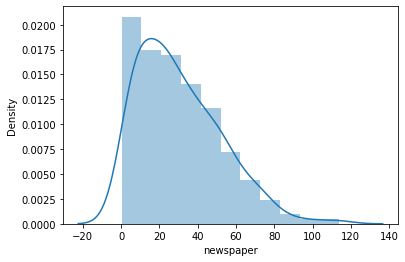

In [10]:
sns.distplot(df["newspaper"])

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radio', ylabel='Density'>

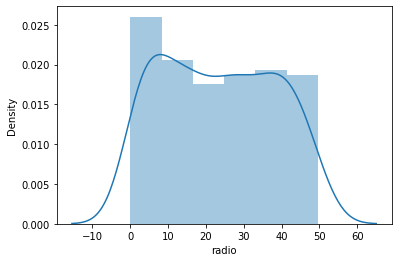

In [11]:
sns.distplot(df["radio"])

In [12]:
df["newspaper"] = np.log1p( df["newspaper"])

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

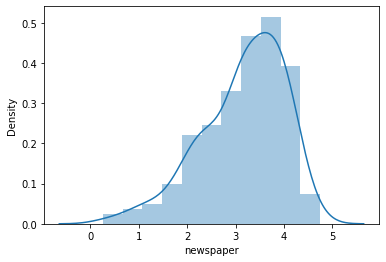

In [13]:
sns.distplot(df["newspaper"])

In [14]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,3.153164,14.022500
std,85.854236,14.846809,0.866508,5.217457
min,0.700000,0.000000,0.262364,1.600000
25%,74.375000,9.975000,2.621019,10.375000
50%,149.750000,22.900000,3.286519,12.900000
75%,218.825000,36.525000,3.830813,17.400000
max,296.400000,49.600000,4.744932,27.000000


In [15]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
mn = MinMaxScaler()
df_mn = mn.fit_transform(df[["TV", "radio", "newspaper"]] )


In [18]:
#df_mn

In [19]:
df_mn_df = pd.DataFrame(df_mn, columns = ["TV", "radio", "newspaper"], index = df.index)

In [20]:
df_mn_df.head()

,TV,radio,newspaper
0,0.775786,0.762097,0.889888
1,0.148123,0.792339,0.796072
2,0.055800,0.925403,0.890206
3,0.509976,0.832661,0.852996
4,0.609063,0.217742,0.852621


In [21]:
X = df_mn_df[["TV", "radio", "newspaper"]]
y = df[["sales"]]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
pred = lr.predict(x_test)

In [27]:
#pred

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
mse = mean_squared_error(y_test, pred)

In [30]:
mse

2.011464426457883

In [31]:
mae = mean_absolute_error(y_test, pred)

In [32]:
mae

1.049732472487043

In [33]:
y_test[:5]

,sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6


In [34]:
pred[:5]

array([[21.76658423],
       [16.49537558],
       [ 7.61032155],
       [17.92001592],
       [18.71544364]])

In [35]:
r2_score(y_test, pred)

0.8917065013140674

In [36]:
train_pred = lr.predict(x_train)

In [37]:
r2_score(y_train, train_pred)

0.896182014418114

In [38]:
lr.coef_

array([[13.85714006,  8.83406614,  0.5214694 ]])

In [40]:
lr.intercept_

array([2.69200645])

#### Big Mart use case

In [41]:
df = pd.read_csv("bigmart_train.csv")

In [42]:
df.shape

(8523, 12)

In [44]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [47]:
df = df.select_dtypes(exclude="object")

In [48]:
df.shape

(8523, 5)

In [49]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [50]:
df.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [51]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [52]:
import seaborn as sns

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

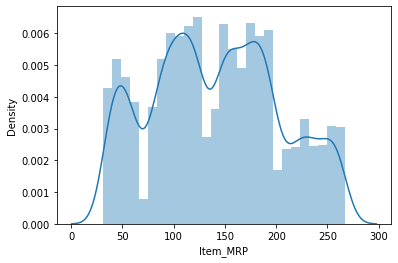

In [54]:
sns.distplot(df["Item_MRP"])

In [55]:
df["Item_Weight"] = df["Item_Weight"].fillna(12.6)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
df["Outlet_Establishment_Year"].nunique()

9

In [58]:
X = df.drop("Item_Outlet_Sales", axis=1)
y = df["Item_Outlet_Sales"]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [63]:
pred = lr.predict(x_test)

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
mae = mean_absolute_error(y_test, pred)

In [66]:
mae

1003.953704858275

In [67]:
r2_score(y_test, pred)

0.3774885045619736

In [68]:
lr.coef_

array([-1.32443460e+00, -4.43859006e+03,  1.53296709e+01, -1.13236839e+01])

### Boston 

In [69]:
df = pd.read_csv("Boston.csv")

In [70]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [71]:
df = df.drop("Unnamed: 0", axis=1)

In [72]:
df.shape

(506, 14)

In [73]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [74]:
X = df.drop("medv", axis=1)
y = df["medv"]

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=100)

In [76]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [77]:
pred = lr.predict(x_test)

In [79]:
mean_absolute_error(y_test, pred)

2.7688726850269476

In [80]:
r2_score(y_test, pred)

0.8360934882713202

In [82]:
r2_score(y_train, lr.predict(x_train))

0.7295355803206066

In [83]:
lr.coef_

array([-7.64685877e-02,  4.63638242e-02,  1.26236827e-02,  2.60153086e+00,
       -1.74904202e+01,  3.45204426e+00,  8.89604293e-04, -1.48390689e+00,
        2.92047842e-01, -1.19135769e-02, -9.84850118e-01,  9.74883682e-03,
       -5.50233196e-01])

In [84]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [85]:
list(zip(X.columns, lr.coef_))

[('crim', -0.07646858766463034),
 ('zn', 0.0463638241944201),
 ('indus', 0.012623682722795477),
 ('chas', 2.601530864537403),
 ('nox', -17.490420199096057),
 ('rm', 3.452044255554308),
 ('age', 0.0008896042934465236),
 ('dis', -1.4839068925161625),
 ('rad', 0.2920478423561528),
 ('tax', -0.011913576859401552),
 ('ptratio', -0.9848501177225168),
 ('black', 0.009748836820789746),
 ('lstat', -0.5502331955161565)]

In [86]:
from sklearn.linear_model import Lasso, Ridge

In [87]:
ls = Lasso()
ls.fit(x_train, y_train)

Lasso()

In [88]:
pred1 = ls.predict(x_test)

In [89]:
r2_score(y_test, pred1)

0.6768933407299896

In [90]:
r2_score(y_train, ls.predict(x_train))

0.6715343335620367

In [91]:
list(zip(X.columns, ls.coef_))

[('crim', -0.021555397350643966),
 ('zn', 0.049940228621473404),
 ('indus', -0.0),
 ('chas', 0.0),
 ('nox', -0.0),
 ('rm', 0.5931017463941023),
 ('age', 0.018527326133715626),
 ('dis', -0.6860385398623229),
 ('rad', 0.24428384580923262),
 ('tax', -0.014939384853096689),
 ('ptratio', -0.7225651708622918),
 ('black', 0.00788849940576714),
 ('lstat', -0.7862647208408761)]

In [98]:
ls = Lasso(alpha=10)
ls.fit(x_train, y_train)

Lasso(alpha=10)

In [99]:
pred1 = ls.predict(x_test)

In [100]:
r2_score(y_test, pred1)

0.4662472314380939

In [125]:
ls = Lasso(alpha=0.9)
ls.fit(x_train, y_train)

Lasso(alpha=0.9)

In [126]:
pred1 = ls.predict(x_test)

In [127]:
r2_score(y_test, pred1)

0.6956397778864165

In [128]:
r2_score(y_train, ls.predict(x_train))

0.6795303841791446

In [92]:
### Ridge

In [93]:
rd = Ridge()
rd.fit(x_train, y_train)

Ridge()

In [94]:
pred2 = rd.predict(x_test)

In [95]:
r2_score(y_test, pred2)

0.8319399095120145

In [96]:
r2_score(y_train, rd.predict(x_train))

0.7276053479667499

In [97]:
list(zip(X.columns, rd.coef_))

[('crim', -0.07249001356425246),
 ('zn', 0.04757458340754886),
 ('indus', -0.01931248887872167),
 ('chas', 2.4409214853281775),
 ('nox', -10.249298160022985),
 ('rm', 3.498426310633127),
 ('age', -0.005491321173597819),
 ('dis', -1.383627874674064),
 ('rad', 0.27492958630955977),
 ('tax', -0.012566306505159452),
 ('ptratio', -0.9004151339901703),
 ('black', 0.010132826773295715),
 ('lstat', -0.5577121258548808)]